# Практична робота № 4. Підготував: Саєнко О. 

 ## Тема. Алгоритми пошуку та їх складність
 ## Мета: Опанувати основні алгоритми сортування та навчитись методам аналізу їх асимптотичної складності.


## 1. Лінійний пошук.
``` python
LinearSearch(A, key)
    for i ← 0 to length(A) - 1
        if A[i] == key
            return i     
    return -1 
```
### У найкращому(якщо шукаємий елемент перший): O(1), у інших: O(n)

## 2. Бінарний пошук:
``` python
inarySearch(A, key)
    low ← 0
    high ← length(A) - 1

    while low ≤ high
        mid ← (low + high) / 2

        if A[mid] == key
            return mid      

        else if A[mid] < key
            low ← mid + 1   

        else
            high ← mid - 1  

    return -1  
```
### У найкращому випадку(якщо шукаємий елемент посередині): O(1), у інших: O(log n)

## 3. Тернарний пошук:
``` python
TernarySearch(A, key, low, high)
    if low > high
        return -1              

    mid1 ← low + (high - low) / 3
    mid2 ← high - (high - low) / 3

    if A[mid1] == key
        return mid1          
    if A[mid2] == key
        return mid2           

    if key < A[mid1]
        return TernarySearch(A, key, low, mid1 - 1)    
    else if key > A[mid2]
        return TernarySearch(A, key, mid2 + 1, high)  
    else
        return TernarySearch(A, key, mid1 + 1, mid2 - 1)
```
### Найкраща складність: O(1), Найгірша складність: O(log₃ n)
Бінарний пошук:
Кожен крок зменшує масив удвічі, що означає, що кількість порівнянь на кожному кроці становить лише 2. Алгоритм працює швидко завдяки цьому простому поділу на дві частини на кожному кроці. Тому, O(log₂ n) є основною оцінкою складності.

Тернарний пошук:
Кожен крок розділяє масив на три частини, що потребує додаткового порівняння (трьох порівнянь на кожному кроці). Тому кількість операцій на кожному кроці зростає до 3. Однак складність алгоритму все одно залишається O(log₃ n), і, при перерахуванні через логарифмічні властивості, вона може бути перерахована як O(log₂ n / log₂ 3), що на практиці не дає значної переваги.

## 4. Порівняти ефективність алгоритмів лінійного, бінарного та тернарного пошуку для різних розмірів вхідного списку.:
``` python
import time
import matplotlib.pyplot as plt
import numpy as np

# Лінійний пошук
def simple_search(array, target):
    for index in range(len(array)):
        if array[index] == target:
            return index
    return -1

# Бінарний пошук
def binary_search(array, target):
    left, right = 0, len(array) - 1
    while left <= right:
        middle = (left + right) // 2
        if array[middle] == target:
            return middle
        elif array[middle] < target:
            left = middle + 1
        else:
            right = middle - 1
    return -1

# Тернарний пошук
def trinary_search(array, target):
    left, right = 0, len(array) - 1
    while left <= right:
        third = (right - left) // 3
        mid1 = left + third
        mid2 = right - third
        if array[mid1] == target:
            return mid1
        if array[mid2] == target:
            return mid2
        if target < array[mid1]:
            right = mid1 - 1
        elif target > array[mid2]:
            left = mid2 + 1
        else:
            left = mid1 + 1
            right = mid2 - 1
    return -1

# Різні розміри масивів
array_sizes = [10, 50, 100, 500, 700, 1000, 2000, 3000]
linear_search_times = []
binary_search_times = []
trinary_search_times = []

# Порівняння часу виконання для різних пошуків
for size in array_sizes:
    array = np.arange(size)  # Генерація масиву за допомогою numpy
    target_value = size - 1  # Останній елемент

    start_time = time.perf_counter()
    simple_search(array, target_value)
    linear_search_times.append(time.perf_counter() - start_time)

    start_time = time.perf_counter()
    binary_search(array, target_value)
    binary_search_times.append(time.perf_counter() - start_time)

    start_time = time.perf_counter()
    trinary_search(array, target_value)
    trinary_search_times.append(time.perf_counter() - start_time)

# Візуалізація результатів
plt.figure(figsize=(10, 6))
plt.plot(array_sizes, linear_search_times, label="Лінійний пошук", marker='o', color='red')
plt.plot(array_sizes, binary_search_times, label="Бінарний пошук", marker='s', color='green')
plt.plot(array_sizes, trinary_search_times, label="Тернарний пошук", marker='^', color='blue')
plt.xlabel("Розмір вхідного списку (n)")
plt.ylabel("Час виконання (сек)")
plt.title("Порівняння ефективності алгоритмів пошуку")
plt.legend()
plt.grid(True)
plt.show()
```


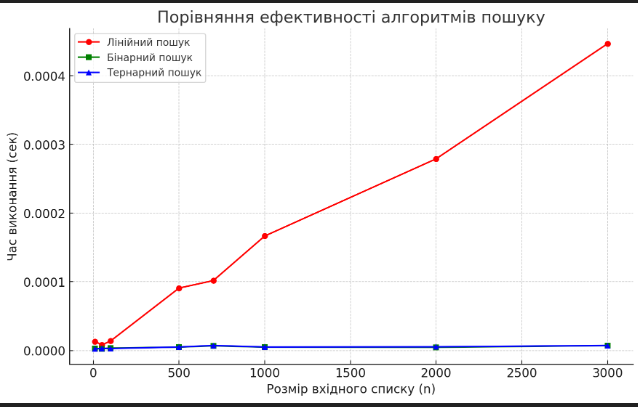

## 5.Порівняти алгоритми пошуку за їхньою здатністю працювати з відсортованими та не відсортованими списками:
``` python
import random
import timeit
import matplotlib.pyplot as plt

def search_linear(arr, target):
    for idx in range(len(arr)):
        if arr[idx] == target:
            return idx
    return -1

def search_binary(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        middle = (low + high) // 2
        if arr[middle] == target:
            return middle
        elif arr[middle] < target:
            low = middle + 1
        else:
            high = middle - 1
    return -1

def search_ternary(arr, target):
    low, high = 0, len(arr) - 1
    while low <= high:
        third = (high - low) // 3
        mid1 = low + third
        mid2 = high - third
        if arr[mid1] == target:
            return mid1
        if arr[mid2] == target:
            return mid2
        if target < arr[mid1]:
            high = mid1 - 1
        elif target > arr[mid2]:
            low = mid2 + 1
        else:
            low = mid1 + 1
            high = mid2 - 1
    return -1

def measure_time(func, arr, target, repetitions=10):
    return timeit.timeit(lambda: func(arr, target), number=repetitions) / repetitions

list_sizes = [10, 100, 1000, 5000, 10000, 20000]
linear_unsorted_times = []
linear_sorted_times = []
binary_sorted_times = []
ternary_sorted_times = []

for size in list_sizes:
    random_list = [random.randint(0, size) for _ in range(size)]
    sorted_list = sorted(random_list)
    target_value = random_list[-1]  

    linear_unsorted_times.append(measure_time(search_linear, random_list, target_value))
    linear_sorted_times.append(measure_time(search_linear, sorted_list, target_value))
    binary_sorted_times.append(measure_time(search_binary, sorted_list, target_value))
    ternary_sorted_times.append(measure_time(search_ternary, sorted_list, target_value))

plt.figure(figsize=(12, 6))
plt.plot(list_sizes, linear_unsorted_times, 'r-o', label='Лінійний (невідсорт.)')
plt.plot(list_sizes, linear_sorted_times, 'r--', label='Лінійний (відсорт.)')
plt.plot(list_sizes, binary_sorted_times, 'g-o', label='Бінарний (відсорт.)')
plt.plot(list_sizes, ternary_sorted_times, 'b-o', label='Тернарний (відсорт.)')
plt.xlabel('Розмір списку')
plt.ylabel('Час виконання (секунди)')
plt.title('Порівняння ефективності пошуку (усереднено через timeit)')
plt.legend()
plt.grid(True)
plt.show()
```

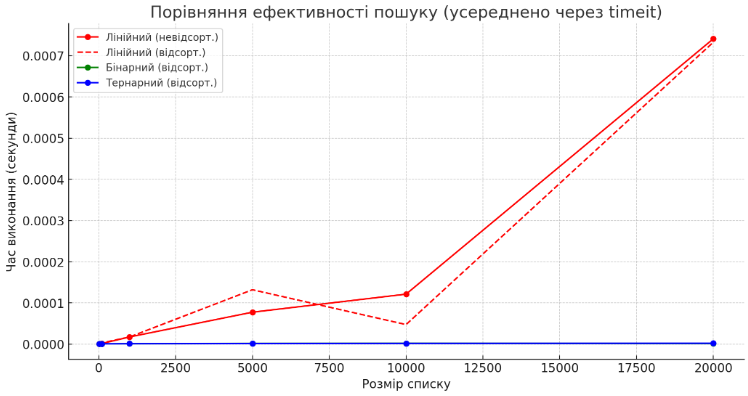

## 6. Розглянути сценарії використання кожного з алгоритмів пошуку у практичних задачах і обґрунтувати вибір кожного алгоритму в конкретному
Лінійний, бінарний та тернарний пошуки є різними методами пошуку елементів у списках, і кожен з них має свої особливості та області застосування.

Лінійний пошук не вимагає попереднього сортування списку та працює добре з невеликою кількістю даних. Наприклад, при пошуку осіб у списку, хто взяв книжку в бібліотеці, немає потреби сортувати цей список, оскільки лінійний пошук дозволяє швидко пройтись по кожному елементу без додаткових витрат часу на сортування.

Бінарний пошук використовується тільки для відсортованих списків. Він ефективний для великих обсягів даних, де сортування виправдовує себе через значне зменшення часу пошуку. Прикладом може бути пошук слова в словнику, де список слів вже відсортований, і бінарний пошук дозволяє швидко знайти потрібне слово.

Тернарний пошук схожий на бінарний, але трохи повільніший. Однак він має своє застосування, особливо при аналізі мінімумів і максимумів унімодальних функцій, де тернарний пошук може ефективно працювати в неіндексованій області, оптимізуючи пошук.

Вибір між цими методами залежить від характеристик даних та вимог до ефективності пошуку.

## 7 . Контрольні питання.
1. Алгоритм пошуку — це метод або процедура для знаходження певної інформації в структурі даних (наприклад, у масиві, списку, дереві тощо). Він забезпечує ефективний доступ до даних і може бути реалізований через різні стратегії пошуку, залежно від типу даних та їхньої організації. Алгоритм пошуку є одним з фундаментальних елементів програмування і комп'ютерних наук, оскільки практично в кожній програмі є потреба ефективно працювати з даними, що зберігаються чи передаються в різних структурах.
2. Часова складність, Просторова складність, Складність в найгіршому випадку, Складність у найкращому випадку,  Середнє часове споживання,  Ітеративність і рекурсивність, Стійкість до помилок, Загальна ефективність і практичне застосування, Гнучкість і адаптивність
3. Лінійний пошук (Linear Search) — це простий алгоритм для пошуку елемента в непотрібному впорядкованому списку або масиві. Він полягає в тому, що алгоритм послідовно перевіряє кожен елемент у структурі даних, порівнюючи його з шуканим значенням, доки не знайде його або не пройде через усі елементи.
4. Дані повинні бути впорядкованими, Масив або список має бути доступний за індексами:
Бінарний пошук зазвичай працює з масивами або списками, доступ до елементі